"I have two metrics: the smoothness and curve structure. the smoothness is defined as S = q1 - 1/3 and curve structure is C=q2-q3. Where q1+q2+q3=1. Smoothness is the x-axis and the curve structure is the y-axis of the plane. What are the superior and inferior limits of these metrics. Generate a python script that plot the lines of the superior and inferior limits of the smoothness X curve structure plane. you will generate all the points for the the superior and inferior curves. for example: for the smallest smoothness S=-1/3 the q1=0 and q2+q3=1. then there is a rangae of values such that q2+q3=1, which will give a range of possible values for the curve structure. Plot the points for maximum and minimum curve structure for values of smoothness range [-1/3,2/3]"

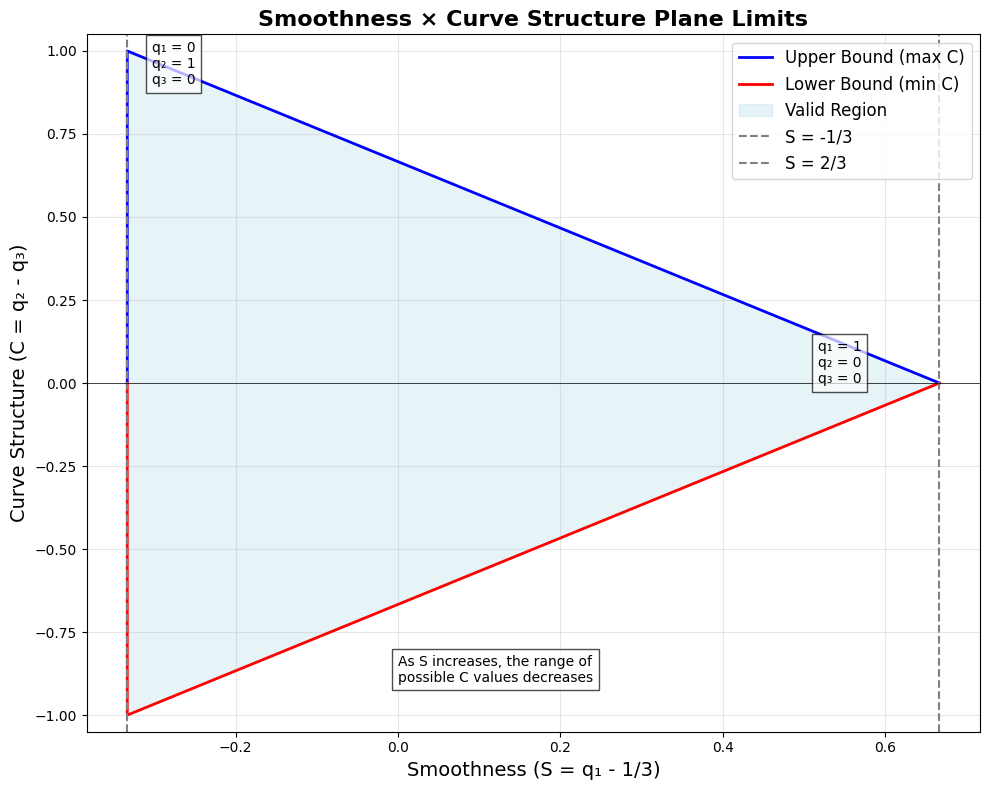

Analytical description of the limits:
For Smoothness (S) in range [-1/3, 2/3]:
- Upper bound of Curve Structure (C): C = 1 - (S + 1/3) = 2/3 - S
- Lower bound of Curve Structure (C): C = -(1 - (S + 1/3)) = S - 2/3
Smoothness-Curve Structure Limits DataFrame:
   Smoothness  Curve_Structure_Superior  Curve_Structure_Inferior
0   -0.333333                  0.000000                 -0.000000
1   -0.333333                  0.001001                 -0.001001
2   -0.333333                  0.002002                 -0.002002
3   -0.333333                  0.003003                 -0.003003
4   -0.333333                  0.004004                 -0.004004

Smothness range: [-0.333333, 0.666667]
Superior curve range: [0.000000, 1.000000]
Inferior curve range: [-1.000000, -0.000000]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Steps
steps = 1000
# Define the range of smoothness values
smoothness_values = np.linspace(-1/3, 2/3, steps)

# Arrays to store curve structure limits
max_curve = []
min_curve = []
s_values = []

# Addes vertical lines at Smoothness= -1/3
for i in np.linspace(0, 1, steps):
    s_values.append(-1/3)
    max_curve.append(i)
    min_curve.append(-i)
    

# Calculate limits for each smoothness value
for s in smoothness_values:
    # Calculate q1 from smoothness
    q1 = s + 1/3
    
    # The sum q2 + q3 = 1 - q1
    q2_plus_q3 = 1 - q1
    
    # Maximum curve structure: q2 is maximum (q2_plus_q3) and q3 is minimum (0)
    max_c = q2_plus_q3
    
    # Minimum curve structure: q2 is minimum (0) and q3 is maximum (q2_plus_q3)
    min_c = - q2_plus_q3
    
    s_values.append(s)
    max_curve.append(max_c)
    min_curve.append(min_c)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the upper and lower bounds
ax.plot(s_values, max_curve, 'b-', linewidth=2, label='Upper Bound (max C)')
ax.plot(s_values, min_curve, 'r-', linewidth=2, label='Lower Bound (min C)')

# Fill the region between curves
ax.fill_between(s_values, min_curve, max_curve, color='lightblue', alpha=0.3, 
                label='Valid Region')

# Add vertical lines at smoothness limits
ax.axvline(x=-1/3, color='gray', linestyle='--', label='S = -1/3')
ax.axvline(x=2/3, color='gray', linestyle='--', label='S = 2/3')

# Add horizontal line at C = 0
ax.axhline(y=0, color='black', linewidth=0.5)

# Labels and title
ax.set_xlabel('Smoothness (S = q₁ - 1/3)', fontsize=14)
ax.set_ylabel('Curve Structure (C = q₂ - q₃)', fontsize=14)
ax.set_title('Smoothness × Curve Structure Plane Limits', fontsize=16, fontweight='bold')

# Set axis limits with a small margin
ax.set_xlim(-1/3 - 0.05, 2/3 + 0.05)
ax.set_ylim(-1 - 0.05, 1 + 0.05)

# Add grid
ax.grid(True, alpha=0.3)

# Add legend
ax.legend(loc='best', fontsize=12)

# Add text annotations explaining the bounds
ax.text(-1/3 + 0.03, 0.9, "q₁ = 0\nq₂ = 1\nq₃ = 0", fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
ax.text(2/3 - 0.15, 0, "q₁ = 1\nq₂ = 0\nq₃ = 0", fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
ax.text(0, -0.9, "As S increases, the range of\npossible C values decreases", 
        fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Display the plot
plt.tight_layout()
# plt.savefig('smoothness_curve_structure_limits.png', dpi=300)
plt.show()

# Print the analytical description of the limits
print("Analytical description of the limits:")
print("For Smoothness (S) in range [-1/3, 2/3]:")
print("- Upper bound of Curve Structure (C): C = 1 - (S + 1/3) = 2/3 - S")
print("- Lower bound of Curve Structure (C): C = -(1 - (S + 1/3)) = S - 2/3")
# Create a dataframe with the smoothness-curve structure limits
scs_limits_df = pd.DataFrame({
    'Smoothness': s_values,
    'Curve_Structure_Superior': max_curve,
    'Curve_Structure_Inferior': min_curve
})

# Save the dataframe to a CSV file
scs_limits_df.to_csv(f'data/limits/SCSP/SCS_limits_steps{steps}.csv', index=False)

# Display the first few rows of the dataframe
print("Smoothness-Curve Structure Limits DataFrame:")
print(scs_limits_df.head())

# Confirm the range of values
print(f"\nSmothness range: [{scs_limits_df['Smoothness'].min():.6f}, {scs_limits_df['Smoothness'].max():.6f}]")
print(f"Superior curve range: [{scs_limits_df['Curve_Structure_Superior'].min():.6f}, {scs_limits_df['Curve_Structure_Superior'].max():.6f}]")
print(f"Inferior curve range: [{scs_limits_df['Curve_Structure_Inferior'].min():.6f}, {scs_limits_df['Curve_Structure_Inferior'].max():.6f}]")